In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [20]:
df=pd.read_csv('D:/prjcts new/FYENN_Lab/ElectricCar_Data_Norm.csv')
df.head(3)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [22]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [23]:
df.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

In [26]:
cm=sns.light_palette('green',as_cmap=True)
df[['Model','Brand','AccelSec']].sort_values(by='AccelSec',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,Model,Brand,AccelSec
68,Kangoo Maxi ZE 33,Renault,22.40
66,e-NV200 Evalia,Nissan,14.00
77,EQ forfour,Smart,12.70
57,Twingo ZE,Renault,12.60
43,CITIGOe iV,Skoda,12.30


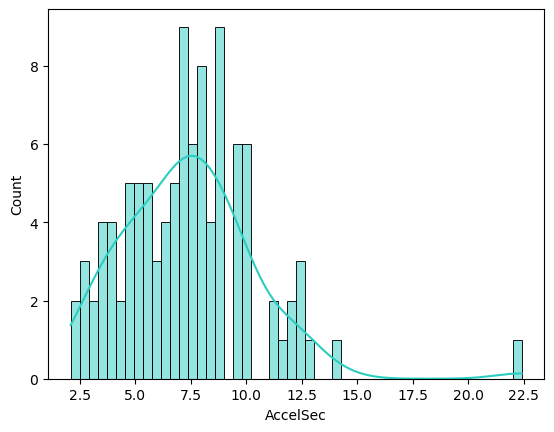

In [27]:
sns.histplot(data=df,x='AccelSec',kde=True,color='#2BCDC1',bins=50)
plt.show()

In [28]:
df[['Model','Brand','Efficiency_WhKm']].sort_values(by='Efficiency_WhKm',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,Model,Brand,Efficiency_WhKm
84,EQV 300 Long,Mercedes,273
90,e-tron S 55 quattro,Audi,270
33,Cybertruck Tri Motor,Tesla,267
67,Cybertruck Dual Motor,Tesla,261
99,e-tron S Sportback 55 quattro,Audi,258


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2=df.copy()
df2['Brand'] = le.fit_transform(df2['Brand'])
df2['Model'] = le.fit_transform(df2['Model'])
df2['RapidCharge'] = le.fit_transform(df2['RapidCharge'])
df2['PowerTrain'] = le.fit_transform(df2['PowerTrain'])
df2['PlugType'] = le.fit_transform(df2['PlugType'])
df2['BodyStyle'] = le.fit_transform(df2['BodyStyle'])
df2['Segment'] = le.fit_transform(df2['Segment'])

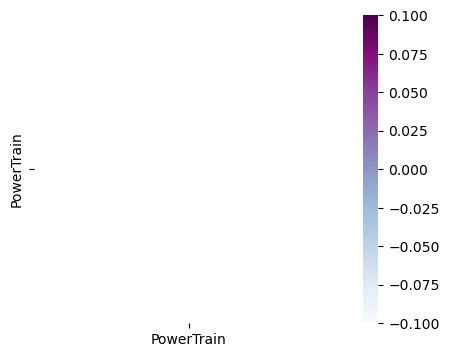

In [16]:
plt.figure(figsize=(5,4))
corr=df2[['TopSpeed','Range','PowerTrain']].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

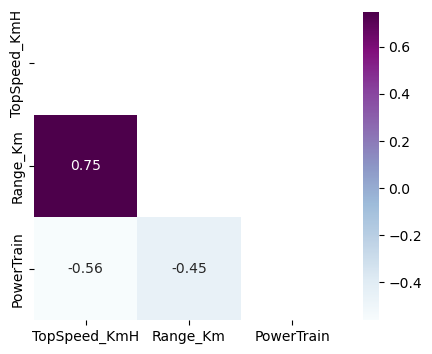

In [30]:
plt.figure(figsize=(5,4))
corr=df2[['TopSpeed_KmH','Range_Km','PowerTrain']].corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

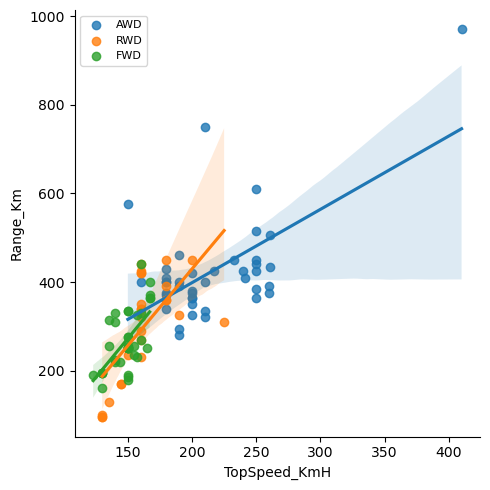

In [31]:
ax=sns.lmplot(x='TopSpeed_KmH',y='Range_Km',hue='PowerTrain',legend=False,data=df)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

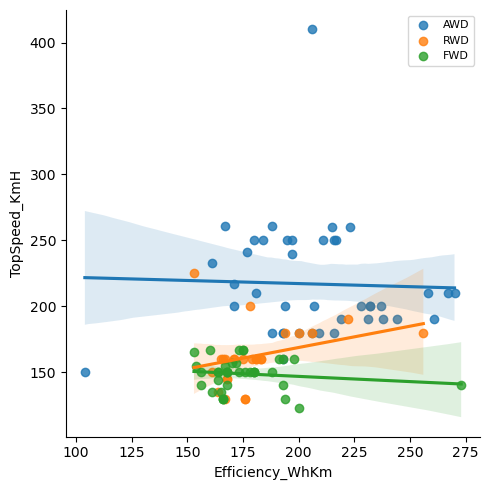

In [32]:
ax=sns.lmplot(x='Efficiency_WhKm',y='TopSpeed_KmH',hue='PowerTrain',legend=False,data=df)
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

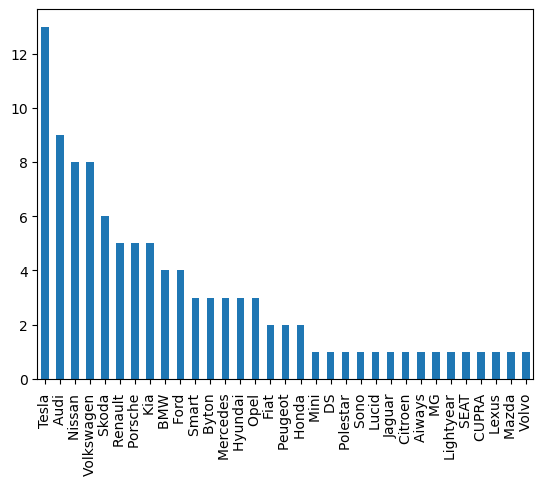

In [33]:
df['Brand'].value_counts().plot(kind='bar')
plt.show()

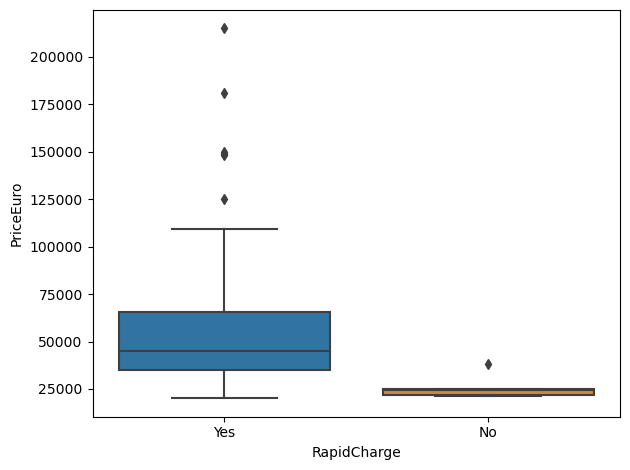

In [34]:
sns.boxplot(y='PriceEuro',x='RapidCharge',data=df)
plt.tight_layout()
plt.show()

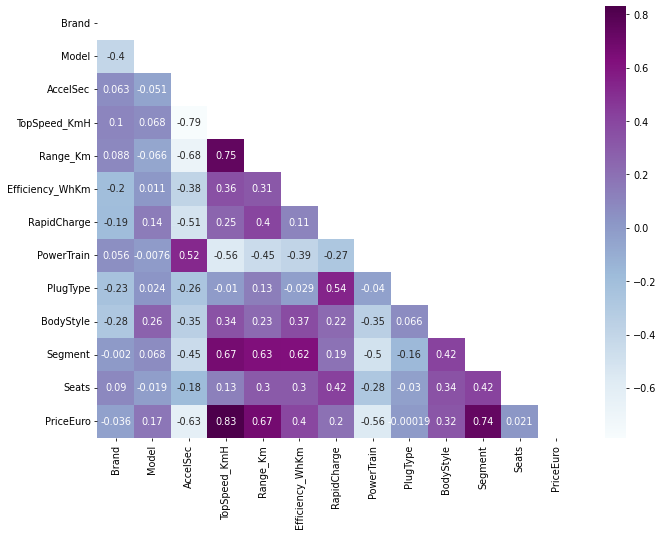

In [35]:
plt.figure(figsize=(11,8),dpi=70)
corr=df2.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,mask=mask,cmap='BuPu')
plt.show()

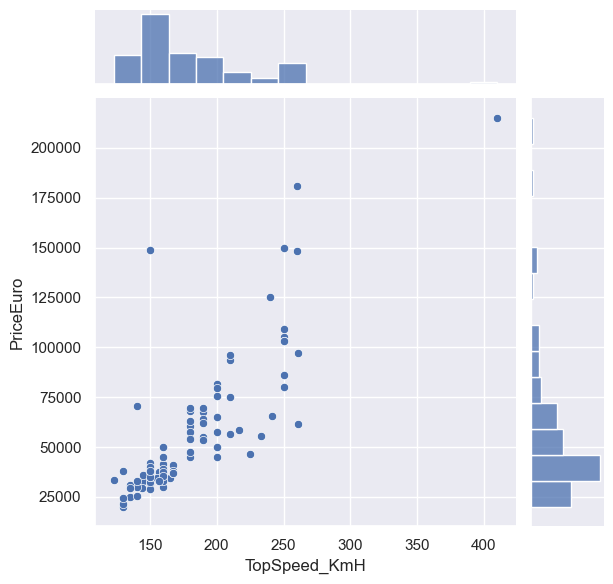

In [36]:
sns.set(rc={'figure.figsize':(5,5)})
sns.jointplot(x='TopSpeed_KmH',y='PriceEuro',data=df2)
plt.show()

In [37]:
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,190,1,2,2,1,1,4,32997


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    int32  
 1   Model            103 non-null    int32  
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int32  
 8   PowerTrain       103 non-null    int32  
 9   PlugType         103 non-null    int32  
 10  BodyStyle        103 non-null    int32  
 11  Segment          103 non-null    int32  
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int32(7), int64(5), object(1)
memory usage: 8.6+ KB


In [39]:
df2['FastCharge_KmH'].value_counts()[:5]

230    6
440    5
540    5
-      5
380    5
Name: FastCharge_KmH, dtype: int64

In [40]:
df.loc[df['FastCharge_KmH']=='-']

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,-,No,RWD,Type 2,Hatchback,A,4,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,-,No,FWD,Type 2,SPV,N,5,38000
77,Smart,EQ forfour,12.7,130,95,176,-,No,RWD,Type 2,Hatchback,A,4,22030
82,Smart,EQ fortwo coupe,11.6,130,100,167,-,No,RWD,Type 2,Hatchback,A,2,21387
91,Smart,EQ fortwo cabrio,11.9,130,95,176,-,No,RWD,Type 2,Cabrio,A,2,24565


In [41]:
df2=df2.drop(index=[57,68,77,82,91],axis=1)

In [42]:
df2=df2.astype(int)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Brand            98 non-null     int32
 1   Model            98 non-null     int32
 2   AccelSec         98 non-null     int32
 3   TopSpeed_KmH     98 non-null     int32
 4   Range_Km         98 non-null     int32
 5   Efficiency_WhKm  98 non-null     int32
 6   FastCharge_KmH   98 non-null     int32
 7   RapidCharge      98 non-null     int32
 8   PowerTrain       98 non-null     int32
 9   PlugType         98 non-null     int32
 10  BodyStyle        98 non-null     int32
 11  Segment          98 non-null     int32
 12  Seats            98 non-null     int32
 13  PriceEuro        98 non-null     int32
dtypes: int32(14)
memory usage: 6.1 KB


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp

In [45]:
X=df2.drop('PriceEuro',axis=1)
y=df2['PriceEuro']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
test_predictions=lr.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 11477.352024204138
MSE: 286008189.76503724
RMSE: 16911.776659033705


In [47]:
print(f'Train Score:{lr.score(X_train,y_train)}')
print(f'Test Score:{lr.score(X_test,y_test)}')

Train Score:0.8846083849626257
Test Score:0.7120919094399014


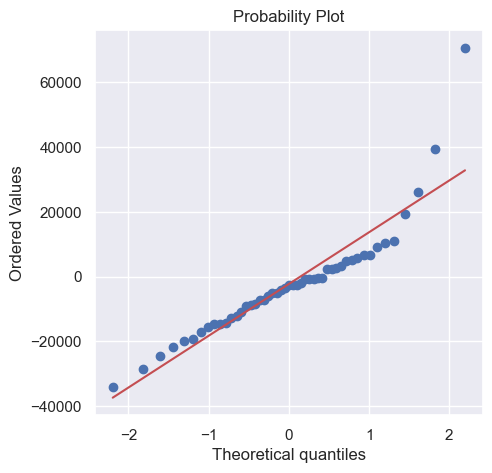

In [48]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [49]:
from sklearn.cross_decomposition import PLSRegression

pls=PLSRegression(n_components=7)
pls.fit(X_train,y_train)

PLSRegression(n_components=7)

In [50]:
test_predictions=pls.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 11455.771355617777
MSE: 285004682.29056156
RMSE: 16882.081693042524


In [51]:
print(f'Train Score:{pls.score(X_train,y_train)}')
print(f'Test Score:{pls.score(X_test,y_test)}')

Train Score:0.8844174785604227
Test Score:0.7131020830334494


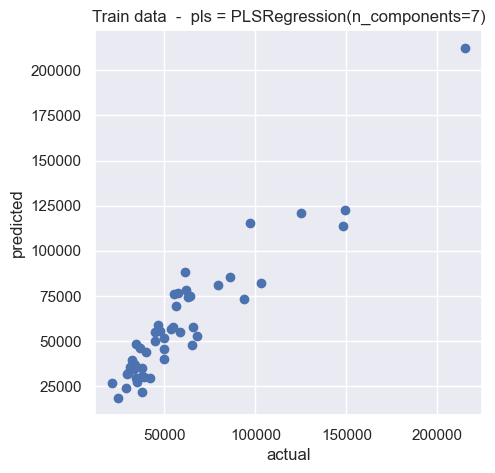

In [52]:
plt.scatter(y_train,pls.predict(X_train))
plt.title('Train data  -  pls = '+str(pls))
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfg=RandomForestRegressor(n_jobs=-1,random_state=42)
rfg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [55]:
test_predictions=rfg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 7659.213469387754
MSE: 158021771.02388573
RMSE: 12570.671064978422


In [56]:
print(f'train score:{rfg.score(X_train,y_train)}')
print(f'test score:{rfg.score(X_test,y_test)}')

train score:0.94243077646521
test score:0.840928518865883


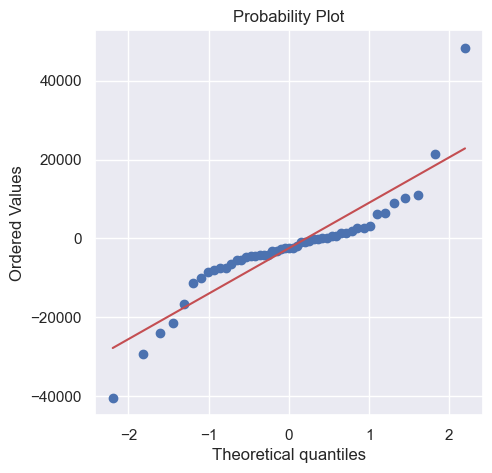

In [57]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
test_predictions=gbr.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 7049.317298269624
MSE: 160572626.02232355
RMSE: 12671.725455608781


In [61]:
print(f'Train Score:{gbr.score(X_train,y_train)}')
print(f'Test Score:{gbr.score(X_test,y_test)}')

Train Score:0.9999267674469171
Test Score:0.8383607189979868


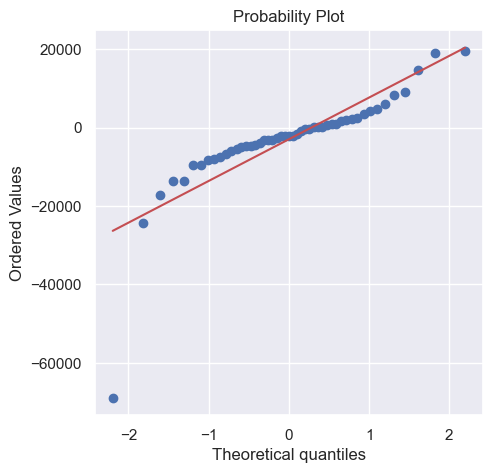

In [62]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [63]:
import xgboost as xgb

xgb_r=xgb.XGBRegressor(objective='reg:linear',n_estimators=300,seed=123)
xgb_r.fit(X_train,y_train)

[23:44:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [64]:
test_predictions=xgb_r.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 8134.378507653061
MSE: 166022104.0906827
RMSE: 12884.956503251484


In [65]:
print(f'Train Score:{xgb_r.score(X_train,y_train)}')
print(f'Test Score:{xgb_r.score(X_test,y_test)}')

Train Score:0.9999999999999294
Test Score:0.8328750410301659


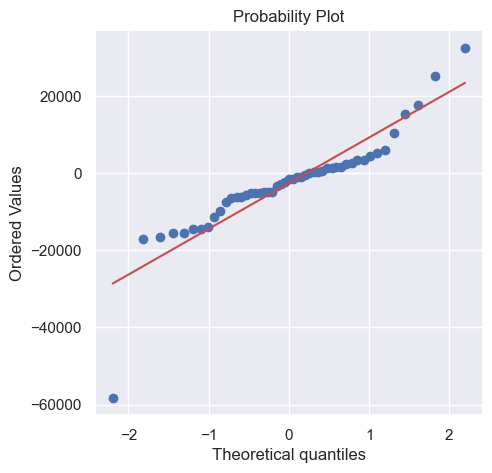

In [66]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [67]:
from sklearn.ensemble import BaggingRegressor

In [68]:
bag_reg=BaggingRegressor(base_estimator=xgb.XGBRegressor(),n_estimators=100,random_state=0)

In [69]:
bag_reg.fit(X_train,y_train)

BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
        

In [70]:
test_predictions=bag_reg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 6982.365513392857
MSE: 141787548.66555116
RMSE: 11907.457691109012


In [71]:
print(f'Train Score:{bag_reg.score(X_train,y_train)}')
print(f'Test Score:{bag_reg.score(X_test,y_test)}')

Train Score:0.9563402955732636
Test Score:0.8572705822339144


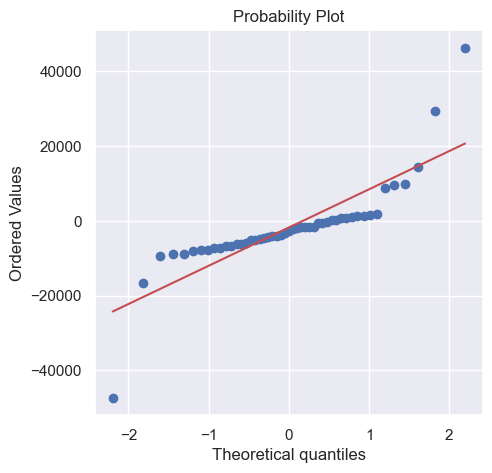

In [72]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [73]:
from sklearn.ensemble import AdaBoostRegressor

In [74]:
ada_reg=AdaBoostRegressor(n_estimators=100,learning_rate=1)

In [75]:
ada_reg.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [76]:
test_predictions=ada_reg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 9564.69851779373
MSE: 172634236.69715866
RMSE: 13139.03484648544


In [77]:
print(f'Train Score:{ada_reg.score(X_train,y_train)}')
print(f'Test Score:{ada_reg.score(X_test,y_test)}')

Train Score:0.9784625083095714
Test Score:0.8262189852199298


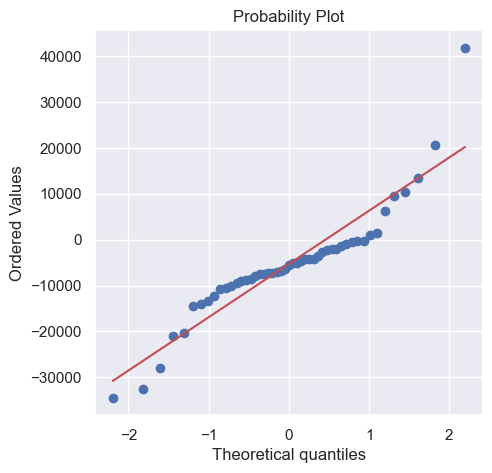

In [78]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [87]:
from catboost import CatBoostRegressor

In [88]:
cb_reg=CatBoostRegressor(random_seed=0,verbose=200,depth=5,iterations=300)
cb_reg.fit(X_train,y_train)

Learning rate set to 0.06766
0:	learn: 35641.8056938	total: 1.33ms	remaining: 397ms
200:	learn: 1982.3077813	total: 150ms	remaining: 74ms
299:	learn: 633.0939265	total: 221ms	remaining: 0us


In [89]:
test_predictions=cb_reg.predict(X_test)
print('MAE:',mean_absolute_error(y_test,test_predictions))
print('MSE:',mean_squared_error(y_test,test_predictions))
print('RMSE:',np.sqrt(mean_squared_error(y_test,test_predictions)))

MAE: 6151.574722161179
MSE: 89393673.75580601
RMSE: 9454.82277759906


In [90]:
print(f'train score:{cb_reg.score(X_train,y_train)}')
print(f'test score:{cb_reg.score(X_test,y_test)}')

train score:0.9996983897558915
test score:0.9100125002003256


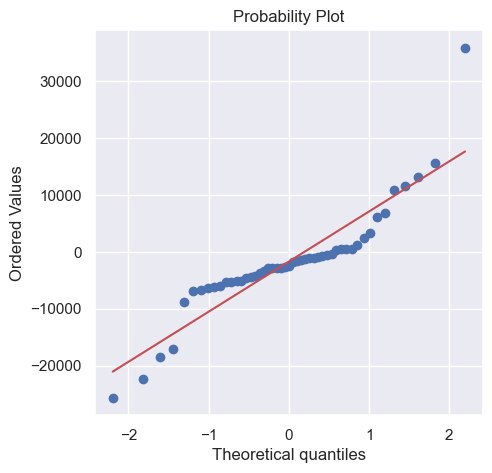

In [91]:
test_res=y_test-test_predictions

fig,ax=plt.subplots(figsize=(5,5))
_=sp.stats.probplot(test_res,plot=ax)

In [85]:
print(f'Linear Regression: {round(lr.score(X_test,y_test),3)}')
print(f'Principle Component Regression (PCR): {round(pls.score(X_test,y_test),3)}')
print(f'Random Forest Regression: {round(rfg.score(X_test,y_test),3)}')
print(f'Gradient Boosting Regression: {round(gbr.score(X_test,y_test),3)}')
print(f'XGBoost Regression: {round(xgb_r.score(X_test,y_test),3)}')
print(f'XGBoost Bagging Regression: {round(bag_reg.score(X_test,y_test),3)}')
print(f'AdaBoost Regression: {round(ada_reg.score(X_test,y_test),3)}')
print(f'CatBoost Regression: {round(cb_reg.score(X_test,y_test),3)}')

Linear Regression: 0.712
Principle Component Regression (PCR): 0.713
Random Forest Regression: 0.841
Gradient Boosting Regression: 0.838
XGBoost Regression: 0.833
XGBoost Bagging Regression: 0.857
AdaBoost Regression: 0.826
CatBoost Regression: 0.91
